# [Plot] Subplots
* 將塞太多組別的圖，拆成多張檢視

# [教學目標]
- 以下程式碼將示範如何將多張圖形, 使用 Subplot 與其參數排定顯示相對位置

# [範例重點]
- 傳統的 subplot 三碼 (row,column,idx) 繪製法 (In[6], Out[6])   
- subplot index 超過 10 以上的繪圖法 (In[7], Out[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '../data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data

,TARGET,DAYS_BIRTH
0,1,9461
1,0,16765
2,0,19046
3,0,19005
4,0,19932
5,0,16941
6,0,13778
7,0,18850
8,0,20099
9,0,14469


In [8]:
np.linspace(20, 70, num = 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [10]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age


# 連續資料離散化
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], 
                                  bins = np.linspace(20, 70, num = 11)) #自 20 到 70 歲，切 11 個點 (得到 10 組)

print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [16]:
age_data['YEARS_BINNED'].unique()

[(25.0, 30.0], (45.0, 50.0], (50.0, 55.0], (35.0, 40.0], (55.0, 60.0], (20.0, 25.0], (30.0, 35.0], (40.0, 45.0], (65.0, 70.0], (60.0, 65.0]]
Categories (10, interval[float64]): [(20.0, 25.0] < (25.0, 30.0] < (30.0, 35.0] < (35.0, 40.0] ... (50.0, 55.0] < (55.0, 60.0] < (60.0, 65.0] < (65.0, 70.0]]

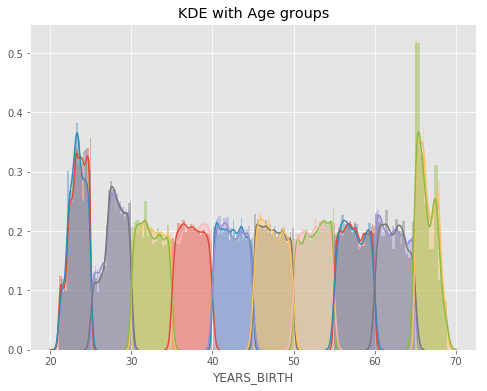

In [32]:
# 資料分群後排序
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())
len(year_group_sorted)

# 繪製分群後的 10 條 KDE 曲線
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
#     print(age_data['YEARS_BINNED'] == year_group_sorted[i])
#     print(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
#                               (age_data['TARGET'] == 0), 'YEARS_BIRTH'])
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

## Subplot
plt.subplot(row,column,idx)

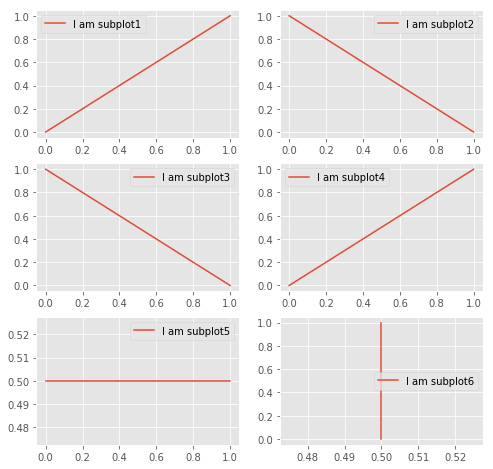

In [39]:
# 每張圖大小為 8x8
plt.figure(figsize=(8,8))

# plt.subplot 三碼如上所述, 分別表示 row總數, column總數, 本圖示第幾幅(idx)
plt.subplot(321)
plt.plot([0,1],[0,1], label = 'I am subplot1')
plt.legend()

plt.subplot(322)
plt.plot([0,1],[1,0], label = 'I am subplot2')
plt.legend()

plt.subplot(323)
plt.plot([1,0],[0,1], label = 'I am subplot3')
plt.legend()

plt.subplot(324)
plt.plot([1,0],[1,0], label = 'I am subplot4')
plt.legend()

plt.subplot(325)
plt.plot([0,1],[0.5,0.5], label = 'I am subplot5')
plt.legend()

plt.subplot(326)
plt.plot([0.5,0.5],[0,1], label = 'I am subplot6')
plt.legend()

plt.show()

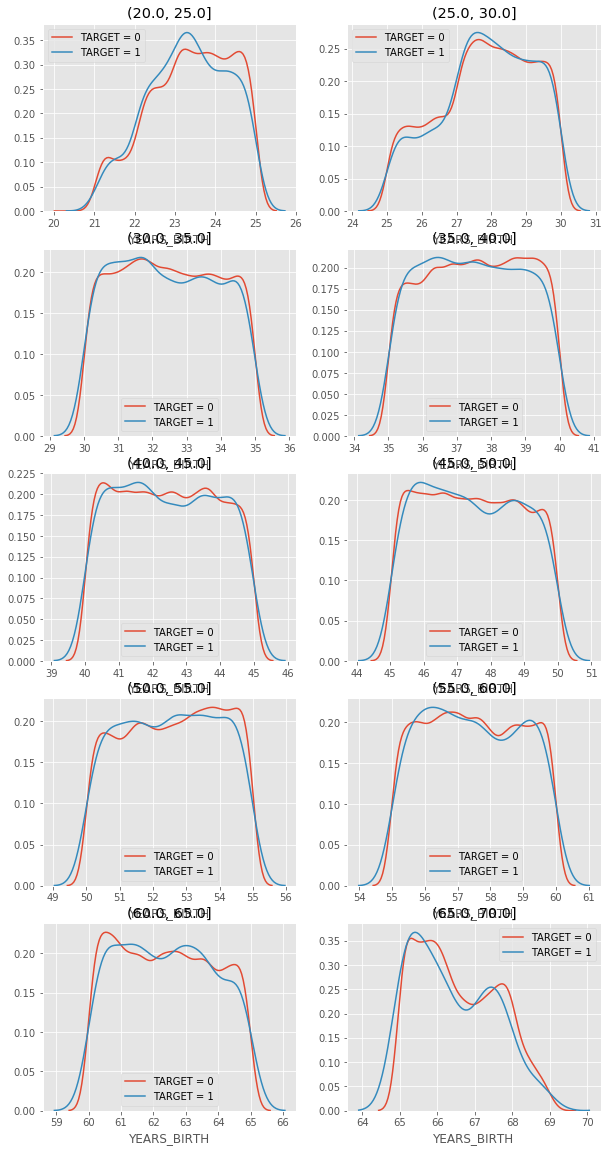

In [47]:
# subplot index 超過10以上的繪製方式
nrows = 5
ncols = 2

plt.figure(figsize=(10,20))
for i in range(len(year_group_sorted)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], 
                 label = "TARGET = 0", hist = False)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], 
                 label = "TARGET = 1", hist = False)
    plt.title(str(year_group_sorted[i]))
plt.show()    

## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram